In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('./Boston-listings.csv')
df.head()
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

# Remove % from 'host_response_rate' and 'host_acceptance_rate'
df['host_response_rate'] = df['host_response_rate'].str.replace(r'%', r'.0').astype('float') 
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace(r'%', r'.0').astype('float') 

In [2]:
def percentage(x):
    return x/100.0

In [3]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['review_scores_rating'], axis=0)
    y = df['review_scores_rating']
    y = y.apply(percentage)
    
    #Drop respondent and expected salary columns  
    df = df[['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_has_profile_pic']]
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
    X = df
    return X, y

#Use the function to create X and y
X, y = clean_data(df) 


In [4]:
# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.15, random_state=42)
# pd.set_option("max_rows", None)

lm_2_model = LinearRegression(normalize=True)
# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_train, y_train)
except Exception as e:
    print(e)

# Predictions here
y_test_preds = lm_2_model.predict(X_test)
r2_test = r2_score(y_test, y_test_preds)
print("R2 score =",r2_test)

mse = mean_squared_error(y_test, y_test_preds)
print("Mean Square error score =",mse)

R2 score = 0.05696539205743201
Mean Square error score = 0.008982617708406578


/Users/georgekorovesis/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [5]:
X,y = clean_data(df) 
mergedDF = X.merge(y.to_frame(), left_index=True, right_index=True)

sortedDF = mergedDF.sort_values(by=['review_scores_rating'],ascending=False)

==============================All Ratings=================================================
AxesSubplot(0.125,0.125;0.62x0.755)


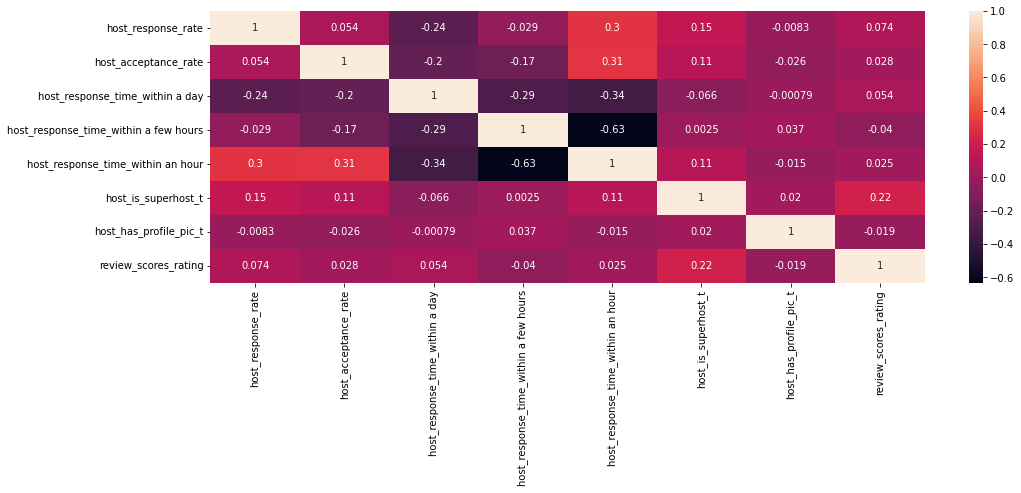

In [6]:
print("==============================All Ratings=================================================")
# print(sortedDF.corr())
corr = sortedDF.corr()
plt.figure(figsize = (16,5))
print(sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True))

In [63]:
# print("======== Rating < 0.85 ========")
sd1 = sortedDF[sortedDF['review_scores_rating'].between(0, 0.85)]
sd2 = (sortedDF[sortedDF['review_scores_rating'].between(0.85, 1)])

======== Rating < 0.85 ========
======== Rating >= 0.85 ========




==============================Ratings < 0.85===============================================
                                       host_response_rate  host_acceptance_rate  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  host_is_superhost_t  host_has_profile_pic_t  review_scores_rating
host_response_rate                               1.000000              0.000947                        -0.142888                              -0.110977                           0.308829             0.035340               -0.006427              0.006656
host_acceptance_rate                             0.000947              1.000000                        -0.200426                              -0.243307                           0.339529             0.053905               -0.003944              0.013809
host_response_time_within a day                 -0.142888             -0.200426                         1.000000                              -0

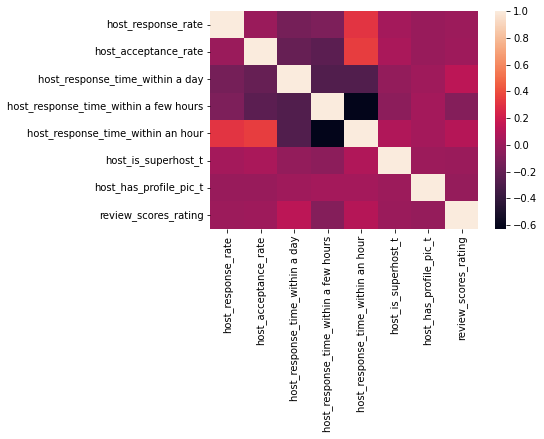

In [64]:
print("\n")
print("==============================Ratings < 0.85===============================================")
# print(sd1.corr())
corr = sd1.corr()
print(sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns))



==============================Ratings > 0.85===============================================
                                       host_response_rate  host_acceptance_rate  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  host_is_superhost_t  host_has_profile_pic_t  review_scores_rating
host_response_rate                               1.000000              0.060986                        -0.253783                              -0.010782                           0.302176             0.150879               -0.008581              0.065041
host_acceptance_rate                             0.060986              1.000000                        -0.213870                              -0.155640                           0.298376             0.113310               -0.030015             -0.007218
host_response_time_within a day                 -0.253783             -0.213870                         1.000000                              -0

<AxesSubplot:>

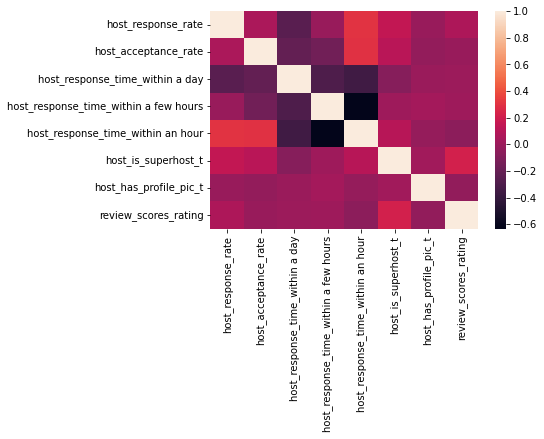

In [65]:
print("\n")
print("==============================Ratings > 0.85===============================================")
# print(sd2.corr())
corr = sd2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)